In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
from string import Template

# ------------------------------QUESTION 1----------------------------------

In [16]:
def training_examples(boolean_function,inputs):
    Y = []
    X = []
    expression = Template(boolean_function)
    for y in inputs:
        substituted = expression.substitute({("x"+str(i)):y[i] for i in range(0,3)})
        result  = eval(substituted)
        Y.append([result])
        X.append([*y])
    return X,Y

def sigmoid (x):
    return 1/(1 + np.exp(-x))

def derivatives_sigmoid(x):
    return x * (1 - x)

# Forward propagation
def forward_propagation(X,wh,bh,wout,bout):
    hidden_layer_input1=np.dot(X,wh)
    hidden_layer_input=hidden_layer_input1 + bh
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    output_layer_input1=np.dot(hiddenlayer_activations,wout)
    output_layer_input= output_layer_input1+ bout
    output = sigmoid(output_layer_input)
    return hiddenlayer_activations, output

# Back propagation
def back_propagation(y,output,hiddenlayer_activations,wout):
    E = y-output
    slope_output_layer = derivatives_sigmoid(output)
    slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
    d_output = E * slope_output_layer
    Error_at_hidden_layer = d_output.dot(wout.T)
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
    return E,d_output, d_hiddenlayer


def update_weights(wout,bout,wh,bh,X,hiddenlayer_activations,d_output, d_hiddenlayer,lr):
    wout += hiddenlayer_activations.T.dot(d_output) *lr
    bout += np.sum(d_output, axis=0,keepdims=True) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
    return wout,bout,wh,bh


def predict(X,wh,bh,wout,bout):
    _,output = forward_propagation(X,wh,bh,wout,bout)
    preds = np.array([[0]*1]*output.shape[0])
    for j in range(output.shape[0]):
        if output[j]>=0.5:
            preds[j] = 1
        else:
            preds[j]= 0

    return preds





In [17]:
def neural_network(X,y):
    epoch=15000
    learning_rate = 0.4
    inputlayer = X.shape[1]
    hiddenlayer = 4
    outputlayer = 1

    # initialize weight and bias
    wh=np.random.uniform(size=(inputlayer,hiddenlayer))
    bh=np.random.uniform(size=(1,hiddenlayer))
    wout=np.random.uniform(size=(hiddenlayer,outputlayer))
    bout=np.random.uniform(size=(1,outputlayer))
    # training the model
    for i in range(epoch):
        hiddenlayer_activations, output = forward_propagation(X,wh,bh,wout,bout)
        E,d_output, d_hiddenlayer = back_propagation(y,output,hiddenlayer_activations,wout)
        wout,bout,wh,b = update_weights(wout,bout,wh,bh,X,hiddenlayer_activations,d_output, d_hiddenlayer,learning_rate)
        if(i%500==0):
            train_error=np.mean(np.abs(E))
            print("epoch {:5} ".format(i),end='-')
            print(' error:{:0.4f} '.format(train_error))


    preds= predict(X,wh,bh,wout,bout)
    print("input:")
    print(X)
    print("Expected output:")
    print(y)
    print("Predicted output")
    print(preds)
    count = 0
    for j in range(preds.shape[0]):
        if preds[j] == y[j]:
            count = count+1
    print("Accuracy:")
    print(count/preds.shape[0]*100)





In [18]:
for i in range(5):
    boolean_function = input("Enter your variable function with three variables as $x0,$x1,$x2 using operators '&','|','^'.")
    inputs = list(itertools.product([0, 1], repeat=3))
    print("\n")
    print("####################BOOLEAN FUNCTION : %d ##################"%(i+1))
    print("\n")
    print(boolean_function)
    print("\n")
    X,y = training_examples(boolean_function,inputs)
    X = np.array(X)
    y = np.array(y)
    neural_network(X,y)



Enter your variable function with three variables as $x0,$x1,$x2 using operators '&','|','^'.$x0&$x1|$x2 ^$x0|$x1&$x2


####################BOOLEAN FUNCTION : 1 ##################


$x0&$x1|$x2 ^$x0|$x1&$x2


epoch     0 - error:0.4251 
epoch   500 - error:0.2435 
epoch  1000 - error:0.1027 
epoch  1500 - error:0.0489 
epoch  2000 - error:0.0351 
epoch  2500 - error:0.0286 
epoch  3000 - error:0.0245 
epoch  3500 - error:0.0218 
epoch  4000 - error:0.0198 
epoch  4500 - error:0.0182 
epoch  5000 - error:0.0170 
epoch  5500 - error:0.0159 
epoch  6000 - error:0.0150 
epoch  6500 - error:0.0143 
epoch  7000 - error:0.0136 
epoch  7500 - error:0.0131 
epoch  8000 - error:0.0126 
epoch  8500 - error:0.0121 
epoch  9000 - error:0.0117 
epoch  9500 - error:0.0113 
epoch 10000 - error:0.0110 
epoch 10500 - error:0.0107 
epoch 11000 - error:0.0104 
epoch 11500 - error:0.0101 
epoch 12000 - error:0.0099 
epoch 12500 - error:0.0096 
epoch 13000 - error:0.0094 
epoch 13500 - error:0.0092 
epoch 1

# ------------------------------QUESTION 2----------------------------------

In [19]:
def generate_frozen_lake(N,M):
    S = np.full((N,N),'F', dtype= object)
    R = np.array([[0]*N]*N)
    S[0][0] = 'S'
    S[N-1][N-1] = 'G'
    R[N-1][N-1] = 100
    List = random.sample(range(1,N*N-1),M)
    for i in List:
        S[int(i/N)][i%N]='H'
        R[int(i/N)][i%N]= -100
    for i in range(N):
        for j in range(N):
            print(S[i][j],end=" ")
        print("\n")
    return S,R


#set moving right = 0 (0,1); moving down = 1 (1,0); moving left = 2 (0,-1); moving up = 3 (-1,0)
list_actions = [(0,1),(1,0),(0,-1),(-1,0)]

def get_possible_actions(current_state,N):
    list_actions = [(0,1),(1,0),(0,-1),(-1,0)]
    valid_actions = []
    for index,action in enumerate(list_actions):
        x, y = action
        new_state_row = int(current_state/N)+x
        new_state_col = current_state%N+y
        if new_state_row>=0 and new_state_col>=0 and new_state_row<N and new_state_col<N:
            valid_actions.append(index)
    return valid_actions



def choose_action(epsilon,current_state,N, Q):
    list_actions = [(0,1),(1,0),(0,-1),(-1,0)]
    valid_actions = get_possible_actions(current_state,N)
    if(random.uniform(0,1)< epsilon):
        return random.choice(valid_actions)
    else:
        Values = []
        for index,item in enumerate(Q[current_state,:]):
              if index in valid_actions:
                    Values.append(item)
        return valid_actions[np.argmax(Values)]

def max_Qvalue(Q,new_state,N):
    possible_actions = get_possible_actions(new_state,N)
    Values = []
    for index,item in enumerate(Q[new_state,:]):
        if index in possible_actions:
            Values.append(item)
    return max(Values)


In [20]:
# Size of lake and number of holes will be taken as input.
N = int(input('Enter the size of the lake'))
M = int(input('Enter the number of holes in the lake'))
S, R = generate_frozen_lake(N,M)


Enter the size of the lake10
Enter the number of holes in the lake20
S F F F F F F H F F 

F H F F F H H H F F 

F F F F F F F F F F 

H F F F F F F F F H 

F H F F F F F F F F 

F F F F F H F F F F 

F H H F F F F F F F 

F F H F H F F H F F 

F F F F F F F H F F 

H F H F F H H H F G 



In [21]:
def train_model(S,R,N,alpha,lambdaa,Q):
    epsilon = 0.99
    num_episodes = 10000
    max_epsilon = 0.99
    min_epsilon = 0.001
    decay_rate = 0.001
    rewards = []
    all_rewards = []
    final_reward = 0
    for i in range(num_episodes):
        reward_gain = 0
        current_state = 0
        while current_state!=(N*N-1):
            action_taken = choose_action(epsilon,current_state,N,Q)
            x,y = list_actions[action_taken]
            new_state_row = int(current_state/N)+x
            new_state_col = current_state%N+y
            new_state = new_state_row*N+new_state_col
            reward_gain += R[new_state_row][new_state_col]
            Q_max = max_Qvalue(Q,new_state,N)
            Q[current_state][action_taken]=(1-alpha)*Q[current_state][action_taken]+alpha*(R[new_state_row][new_state_col]+lambdaa*Q_max)
            if new_state==(N*N-1):
                break
            else:
                current_state = new_state
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*i)
        rewards.append(reward_gain)


        if(i%100==0):
            print("Episode no. %d, epsilon=%f,  Avg reward:%f" %(i,epsilon,sum(rewards)/100))
            all_rewards.append(sum(rewards)/100)
            if i==7000:
                final_reward = sum(rewards)/100
            rewards = []

    print(Q)
    return final_reward, all_rewards


Episode no. 0, epsilon=0.990000,  Avg reward:-94.000000
Episode no. 100, epsilon=0.895884,  Avg reward:-4555.000000
Episode no. 200, epsilon=0.810725,  Avg reward:-1787.000000
Episode no. 300, epsilon=0.733669,  Avg reward:-952.000000
Episode no. 400, epsilon=0.663947,  Avg reward:-408.000000
Episode no. 500, epsilon=0.600859,  Avg reward:-323.000000
Episode no. 600, epsilon=0.543775,  Avg reward:-198.000000
Episode no. 700, epsilon=0.492123,  Avg reward:-134.000000
Episode no. 800, epsilon=0.445386,  Avg reward:-81.000000
Episode no. 900, epsilon=0.403097,  Avg reward:-48.000000
Episode no. 1000, epsilon=0.364833,  Avg reward:-34.000000
Episode no. 1100, epsilon=0.330210,  Avg reward:-17.000000
Episode no. 1200, epsilon=0.298881,  Avg reward:9.000000
Episode no. 1300, epsilon=0.270534,  Avg reward:18.000000
Episode no. 1400, epsilon=0.244884,  Avg reward:34.000000
Episode no. 1500, epsilon=0.221676,  Avg reward:44.000000
Episode no. 1600, epsilon=0.200676,  Avg reward:50.000000
Episod

Text(0, 0.5, 'Reward')

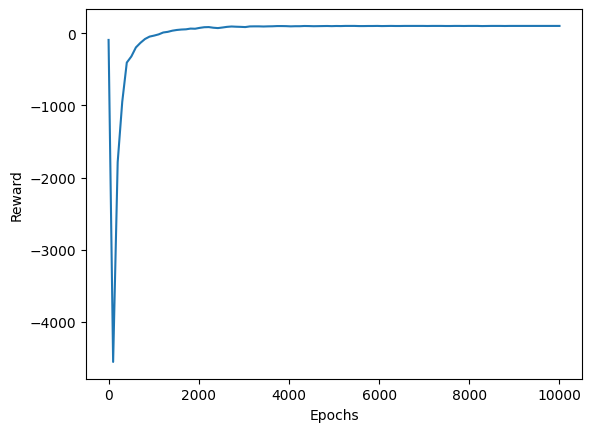

In [22]:
alpha = 0.7
l1 = 0.99
Q = np.array([[0]*4]*(N*N))
final_reward, all_rewards = train_model(S,R,N,alpha,l1,Q)

episodes = np.linspace(0, 10000, 100)
plt.plot(episodes,all_rewards)
plt.xlabel("Epochs")
plt.ylabel("Reward")

As we can see from the plot clearly that after a certain number of Epochs the reward value settles to "0".

Episode no. 0, epsilon=0.990000,  Avg reward:-131.000000
Episode no. 100, epsilon=0.895884,  Avg reward:-5822.000000
Episode no. 200, epsilon=0.810725,  Avg reward:-1834.000000
Episode no. 300, epsilon=0.733669,  Avg reward:-984.000000
Episode no. 400, epsilon=0.663947,  Avg reward:-532.000000
Episode no. 500, epsilon=0.600859,  Avg reward:-279.000000
Episode no. 600, epsilon=0.543775,  Avg reward:-236.000000
Episode no. 700, epsilon=0.492123,  Avg reward:-214.000000
Episode no. 800, epsilon=0.445386,  Avg reward:-148.000000
Episode no. 900, epsilon=0.403097,  Avg reward:-114.000000
Episode no. 1000, epsilon=0.364833,  Avg reward:-105.000000
Episode no. 1100, epsilon=0.330210,  Avg reward:-84.000000
Episode no. 1200, epsilon=0.298881,  Avg reward:-57.000000
Episode no. 1300, epsilon=0.270534,  Avg reward:-33.000000
Episode no. 1400, epsilon=0.244884,  Avg reward:-22.000000
Episode no. 1500, epsilon=0.221676,  Avg reward:-39.000000
Episode no. 1600, epsilon=0.200676,  Avg reward:-7.0000

Text(0, 0.5, 'Reward')

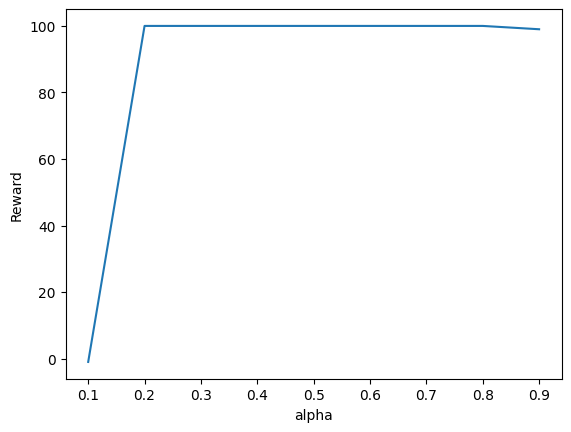

In [23]:
alpha_values =[]
y = []
for i in range(1,10):
    alphaa = i/10
    l2 = 0.99
    Q = np.array([[0]*4]*(N*N))
    alpha_values.append(alphaa)
    final_reward, all_rewards = train_model(S,R,N,alphaa,l2,Q)
    y.append(final_reward)


plt.plot(alpha_values,y)
plt.xlabel("alpha")
plt.ylabel("Reward")

FOR C PART-- EFFECT OF alpha
Low Alpha: When alpha is too low (e.g., close to 0.1), the model updates Q-values very slowly, and learning might not converge well, leading to lower rewards.
High Alpha: When alpha is too high (e.g., 0.9), learning can become unstable as the Q-values change too drastically, which may also result in lower rewards.
Optimal Alpha: You should observe an intermediate alpha that provides the best balance between stable and fast learning, maximizing the final reward.

Episode no. 0, epsilon=0.990000,  Avg reward:-51.000000
Episode no. 100, epsilon=0.895884,  Avg reward:-5102.000000
Episode no. 200, epsilon=0.810725,  Avg reward:-1764.000000
Episode no. 300, epsilon=0.733669,  Avg reward:-1152.000000
Episode no. 400, epsilon=0.663947,  Avg reward:-599.000000
Episode no. 500, epsilon=0.600859,  Avg reward:-509.000000
Episode no. 600, epsilon=0.543775,  Avg reward:-263.000000
Episode no. 700, epsilon=0.492123,  Avg reward:-234.000000
Episode no. 800, epsilon=0.445386,  Avg reward:-180.000000
Episode no. 900, epsilon=0.403097,  Avg reward:-149.000000
Episode no. 1000, epsilon=0.364833,  Avg reward:-122.000000
Episode no. 1100, epsilon=0.330210,  Avg reward:-98.000000
Episode no. 1200, epsilon=0.298881,  Avg reward:-90.000000
Episode no. 1300, epsilon=0.270534,  Avg reward:-104.000000
Episode no. 1400, epsilon=0.244884,  Avg reward:-100.000000
Episode no. 1500, epsilon=0.221676,  Avg reward:-79.000000
Episode no. 1600, epsilon=0.200676,  Avg reward:-90.0

Text(0, 0.5, 'Reward')

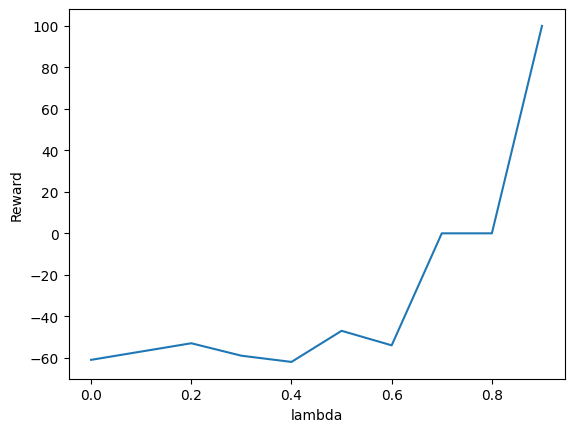

In [24]:
lambda_values =[]
y_1 = []
for i in range(0,10):
    alphaa = 0.4
    l3 = i/10
    Q = np.array([[0]*4]*(N*N))
    lambda_values.append(l3)
    final_reward1, all_rewards = train_model(S,R,N,alphaa,l3,Q)
    y_1.append(final_reward1)

plt.plot(lambda_values,y_1)
plt.xlabel("lambda")
plt.ylabel("Reward")

FOR C PART-- EFFECT OF Lambda:
Perfornmance is increasing with increasing lambda.

S F F F 

F F F H 

H H F F 

H H F G 

Episode no. 0, epsilon=0.990000,  Avg reward:-18.000000
Episode no. 100, epsilon=0.895884,  Avg reward:-821.000000
Episode no. 200, epsilon=0.810725,  Avg reward:-556.000000
Episode no. 300, epsilon=0.733669,  Avg reward:-282.000000
Episode no. 400, epsilon=0.663947,  Avg reward:-152.000000
Episode no. 500, epsilon=0.600859,  Avg reward:-125.000000
Episode no. 600, epsilon=0.543775,  Avg reward:-94.000000
Episode no. 700, epsilon=0.492123,  Avg reward:-47.000000
Episode no. 800, epsilon=0.445386,  Avg reward:14.000000
Episode no. 900, epsilon=0.403097,  Avg reward:29.000000
Episode no. 1000, epsilon=0.364833,  Avg reward:41.000000
Episode no. 1100, epsilon=0.330210,  Avg reward:27.000000
Episode no. 1200, epsilon=0.298881,  Avg reward:44.000000
Episode no. 1300, epsilon=0.270534,  Avg reward:58.000000
Episode no. 1400, epsilon=0.244884,  Avg reward:68.000000
Episode no. 1500, epsilon=0.221676,  Avg reward:70.000000
Episode no. 1600, epsilon=0.200

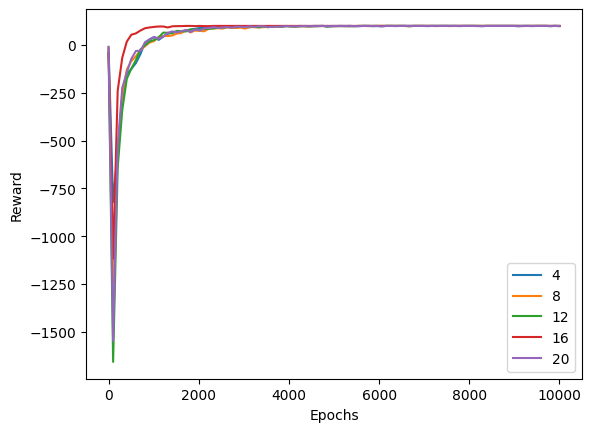

In [25]:
#variation of N
N_values = []
N_rewards = []
for i in range(1,6):
    N = i*4
    N_values.append(N)
    S, R = generate_frozen_lake(N,5)
    alphaa = 0.4
    lambdaaa = 0.99
    Q = np.array([[0]*4]*(N*N))
    final_reward, all_rewards = train_model(S,R,N,alphaa,lambdaaa,Q)
    N_rewards.append(all_rewards)


episodes = np.linspace(0, 10000, 100)

for y_arr, label in zip(N_rewards,N_values):
    plt.plot(episodes, y_arr, label=label)
plt.xlabel("Epochs")
plt.ylabel("Reward")
plt.legend()
plt.show()


S F F F 

H F F F 

F H F F 

H F H G 

Episode no. 0, epsilon=0.990000,  Avg reward:-10.000000
Episode no. 100, epsilon=0.895884,  Avg reward:-689.000000
Episode no. 200, epsilon=0.810725,  Avg reward:-303.000000
Episode no. 300, epsilon=0.733669,  Avg reward:-216.000000
Episode no. 400, epsilon=0.663947,  Avg reward:-87.000000
Episode no. 500, epsilon=0.600859,  Avg reward:-29.000000
Episode no. 600, epsilon=0.543775,  Avg reward:-16.000000
Episode no. 700, epsilon=0.492123,  Avg reward:13.000000
Episode no. 800, epsilon=0.445386,  Avg reward:30.000000
Episode no. 900, epsilon=0.403097,  Avg reward:53.000000
Episode no. 1000, epsilon=0.364833,  Avg reward:70.000000
Episode no. 1100, epsilon=0.330210,  Avg reward:65.000000
Episode no. 1200, epsilon=0.298881,  Avg reward:73.000000
Episode no. 1300, epsilon=0.270534,  Avg reward:69.000000
Episode no. 1400, epsilon=0.244884,  Avg reward:90.000000
Episode no. 1500, epsilon=0.221676,  Avg reward:83.000000
Episode no. 1600, epsilon=0.200676

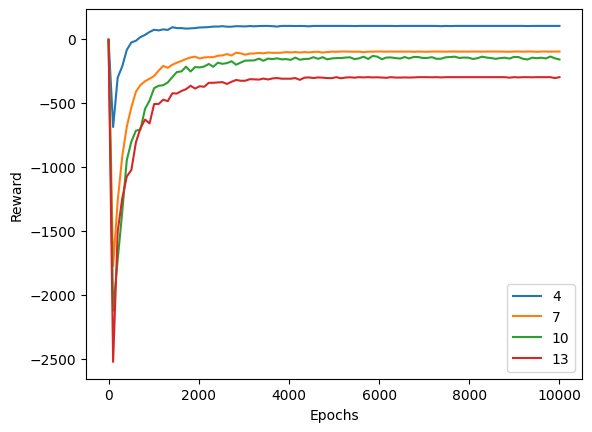

In [28]:
#variation of M
M_values = []
M_rewards = []
M = 1
for i in range(4):
    N = 4
    M = M+3

    M_values.append(M)
    S, R = generate_frozen_lake(N,M)
    alphaa = 0.7
    lambdaaa = 0.99
    Q = np.array([[0]*4]*(N*N))
    final_reward, all_rewards = train_model(S,R,N,alphaa,lambdaaa,Q)
    M_rewards.append(all_rewards)


episodes = np.linspace(0, 10000, 100)

for y_arr, label in zip(M_rewards,M_values):
    plt.plot(episodes, y_arr, label=label)
plt.xlabel("Epochs")
plt.ylabel("Reward")
plt.legend()
plt.show()

EFFECT OF M:-So we can see from the above graph that, for given size N, the ability to find the optimum path reduces with increase in number of holes(M)

Increasing
N enlarges the state space, making the learning process more complex and requiring more episodes to converge on an optimal policy. A larger lake adds more possible states, increasing the need for exploration and potentially delaying the exploitation of optimal strategies. Additionally, longer and more intricate paths in larger lakes make it harder for the agent to navigate and find the goal efficiently. The reward structure also becomes more nuanced, with more opportunities to encounter both rewards (goal) and penalties (holes).

The number of holes (
M) introduces additional risks. As
M increases, the agent encounters penalties more frequently, which slows learning and increases caution in its strategies. More holes mean the agent must focus on exploring safer paths, and an overabundance of holes can reduce the likelihood of reaching the goal, stalling learning progress.

# ------------------------------QUESTION 3----------------------------------

In [29]:
def rulkov_map(x,y,alpha,mu,sigma):
    y_new = y -mu*(x+1)+ mu*sigma
    x_new = 0
    if x<=0:
        x_new = (alpha/(1-x))+y
    elif x>0 and x<alpha+y:
        x_new = alpha+y
    else:
        x_new = -1
    return x_new,y_new

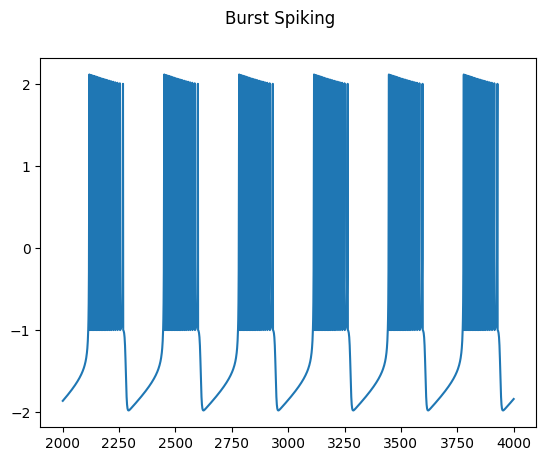

In [30]:
tsteps = []
xlist = []
x = -1.0
y = 0
for i in range(4000):
    tsteps.append(i+1)
    x_new,y_new = rulkov_map(x,y,6.0,0.001,0.002)
    xlist.append(x_new)
    x = x_new
    y = y_new

plt.plot(tsteps[2000:],xlist[2000:])
plt.suptitle("Burst Spiking")
plt.show()

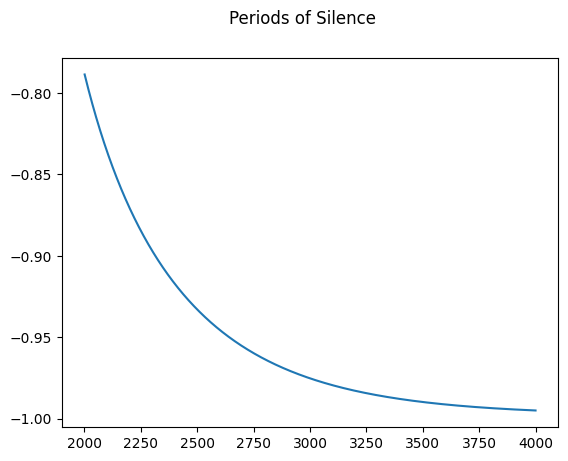

In [31]:
tsteps = []
xlist = []
x = -1.0
y = 0
for i in range(4000):
    tsteps.append(i+1)
    x_new,y_new = rulkov_map(x,y,2.0,0.001,0.002)
    xlist.append(x_new)
    x = x_new
    y = y_new

plt.plot(tsteps[2000:],xlist[2000:])
plt.suptitle("Periods of Silence")
plt.show()

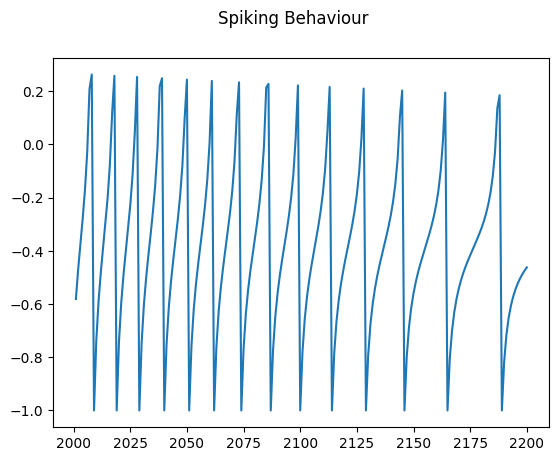

In [32]:
tsteps = []
xlist = []
x = -1.0
y = 0
for i in range(4000):
    tsteps.append(i+1)
    x_new,y_new = rulkov_map(x,y,2.0,0.001,0.2)
    xlist.append(x_new)
    x = x_new
    y = y_new

plt.plot(tsteps[2000:2200],xlist[2000:2200])
plt.suptitle("Spiking Behaviour")
plt.show()

ABOVE OUTPUTS ARE OPTIMAL AS PER MY CHOICE AS REFERRED FROM THE GIVEN RESEARCH PAPER. Variation with parameters is shown below.

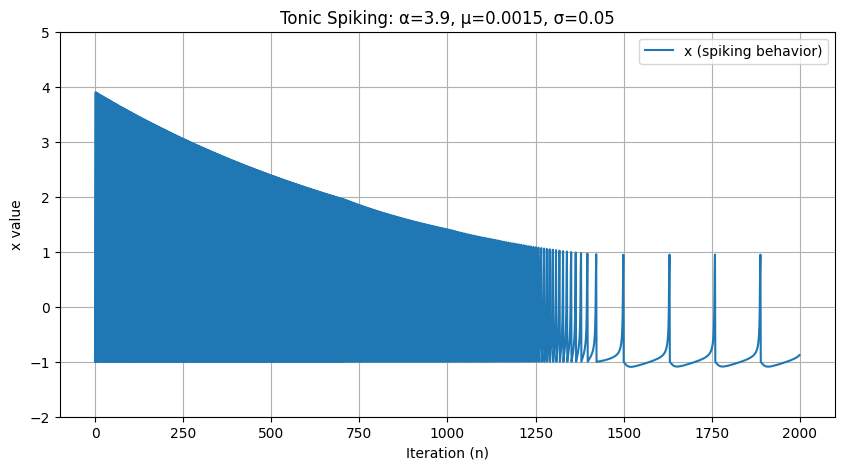

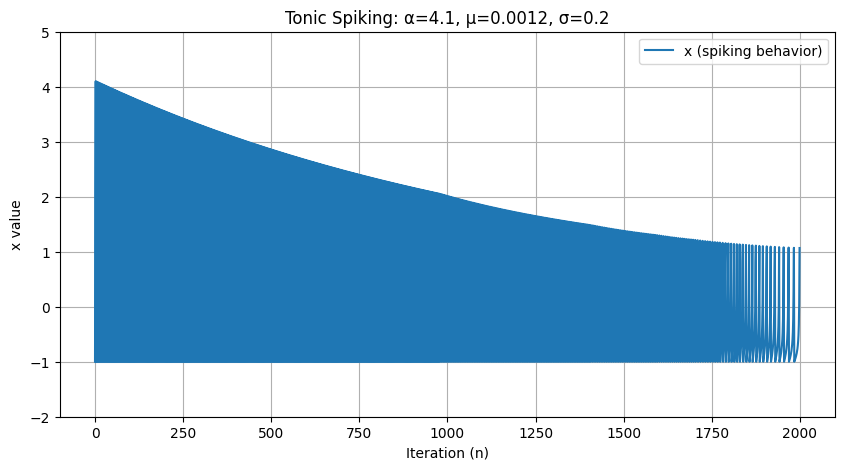

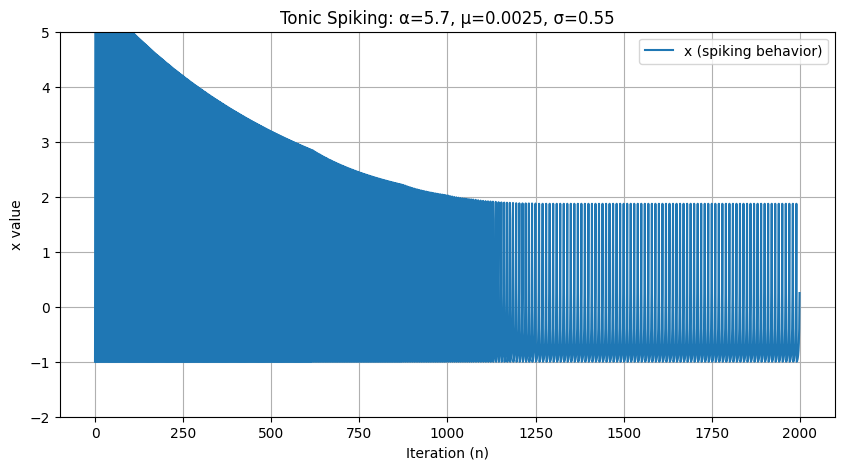

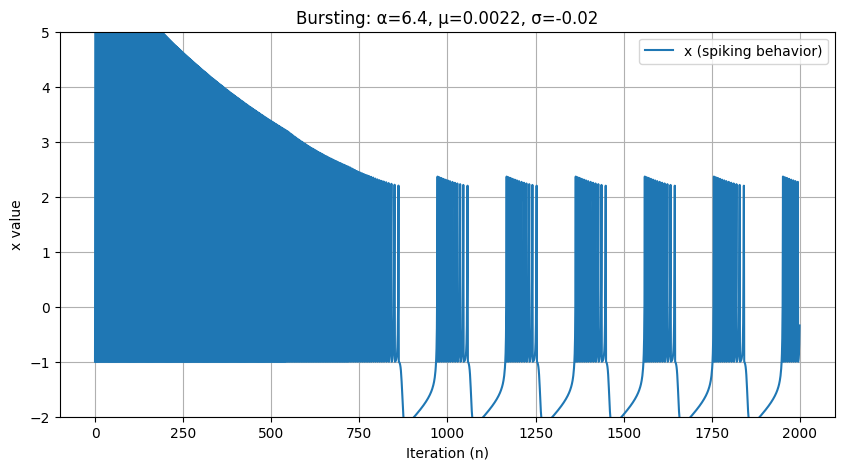

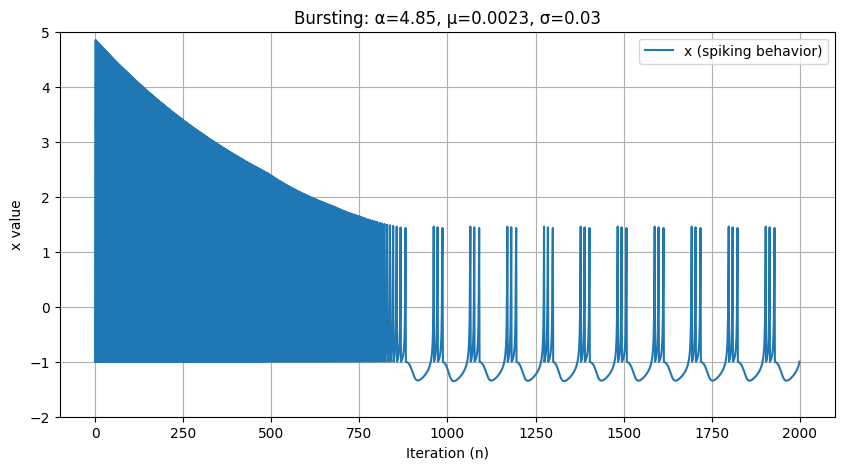

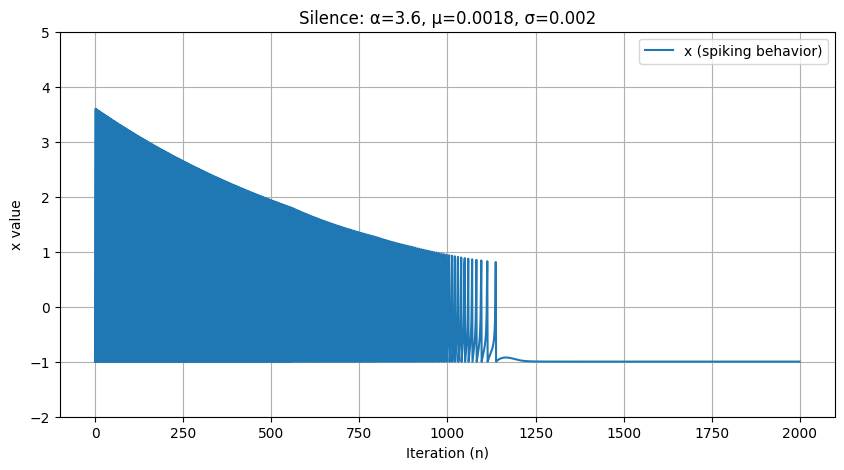

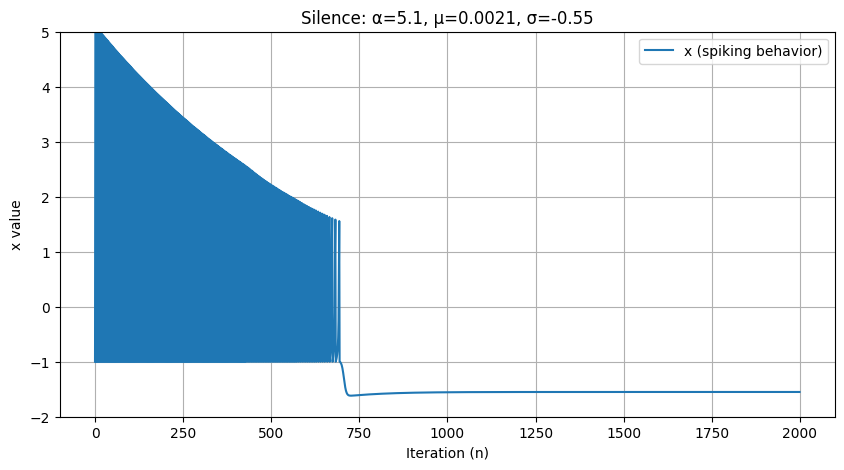

In [37]:
def rulkov_map(x, y, alpha):
    if x <= 0:
        return alpha / (1 - x) + y
    elif 0 < x < alpha + y:
        return alpha + y
    else:
        return -1

def simulate_rulkov(alpha, mu, sigma, n_iterations=1000):
    x_values = np.zeros(n_iterations)
    y_values = np.zeros(n_iterations)

    x_values[0] = -1.0
    y_values[0] = 0

    for n in range(n_iterations - 1):
        x_next = rulkov_map(x_values[n], y_values[n], alpha)
        y_next = y_values[n] - mu * (x_values[n] + 1) + mu * sigma

        x_values[n + 1] = x_next
        y_values[n + 1] = y_next

    return x_values, y_values

def plot_rulkov_behavior(alpha, mu, sigma, n_iterations=1000, title=''):
    x_values, _ = simulate_rulkov(alpha, mu, sigma, n_iterations)

    plt.figure(figsize=(10, 5))
    plt.plot(x_values, label='x (spiking behavior)')
    plt.xlabel('Iteration (n)')
    plt.ylabel('x value')
    plt.title(title)
    plt.ylim(-2, 5)
    plt.legend()
    plt.grid(True)
    plt.show()

tonic_spiking_params = [
    (3.9, 0.0015, 0.05),
    (4.1, 0.0012, 0.2),
    (5.7, 0.0025, 0.55)
]

bursting_params = [
    (6.4, 0.0022, -0.02),
    (4.85, 0.0023, 0.03)
]

silence_params = [
    (3.6, 0.0018, 0.002),
    (5.1, 0.0021, -0.55)
]

for alpha, mu, sigma in tonic_spiking_params:
    plot_rulkov_behavior(alpha, mu, sigma, n_iterations=2000, title=f'Tonic Spiking: α={alpha}, μ={mu}, σ={sigma}')

# Plotting bursting behavior
for alpha, mu, sigma in bursting_params:
    plot_rulkov_behavior(alpha, mu, sigma, n_iterations=2000, title=f'Bursting: α={alpha}, μ={mu}, σ={sigma}')

# Plotting silence behavior
for alpha, mu, sigma in silence_params:
    plot_rulkov_behavior(alpha, mu, sigma, n_iterations=2000, title=f'Silence: α={alpha}, μ={mu}, σ={sigma}')


OBSERVATIONS--
For α<4.0, the system shows distinct behavior based on the value of
σ. When
σ is high (e.g. σ=0.1), the system exhibits regular spikes, with the frequency increasing as
σ increases further (e.g.σ=0.3). However, at low
σ values (e.g. σ=0.001), the system remains in a steady state, characterized by silence.

In contrast, for
α>4.0, the map predominantly produces bursts of spikes. With intermediate values of
σ (e.g.
σ=−0.01), the system exhibits spiking-bursting regimes that include periodic and chaotic behaviors. At very low
σ values (e.g.,
σ=−0.6), the system stabilizes into a steady state, showing no spiking activity. High positive
σ leads to continuous tonic spiking, where the system spikes without transitioning to a silent state.

Thus,
α and
σ together control spiking, bursting, or silence.

In [38]:
#empirical demonstration

In [39]:
def rulkov_map(x, y, alpha):
    if x <= 0:
        return alpha / (1 - x) + y
    elif 0 < x < alpha + y:
        return alpha + y
    else:
        return -1

def simulate_rulkov(alpha, mu, sigma, n_iterations=1000):
    x_values = np.zeros(n_iterations)
    y_values = np.zeros(n_iterations)

    x_values[0] = -1.0
    y_values[0] = 0

    for n in range(n_iterations - 1):
        x_next = rulkov_map(x_values[n], y_values[n], alpha)
        y_next = y_values[n] - mu * (x_values[n] + 1) + mu * sigma

        x_values[n + 1] = x_next
        y_values[n + 1] = y_next

    return x_values, y_values

def classify_regime(x_values):
    spike_threshold = 1.0
    spike_count = np.sum(x_values > spike_threshold)

    if spike_count > 300:
        return 'Tonic Spiking'
    elif 50 < spike_count <= 300:
        return 'Bursting'
    else:
        return 'Silence'

def explore_parameter_ranges(alpha_range, mu_range, sigma_range, n_iterations=1000):
    regimes = []

    for alpha in alpha_range:
        for mu in mu_range:
            for sigma in sigma_range:
                x_values, _ = simulate_rulkov(alpha, mu, sigma, n_iterations)
                regime = classify_regime(x_values)
                regimes.append((alpha, mu, sigma, regime))
                print(f'α={alpha}, μ={mu}, σ={sigma} → {regime}')

    return regimes

# Parameter ranges to explore
alpha_range = np.linspace(3.0, 6.5, 5)
mu_range = np.linspace(0.001, 0.003, 3)
sigma_range = np.linspace(-0.2, 0.6, 5)


explore_parameter_ranges(alpha_range, mu_range, sigma_range, n_iterations=2000)


α=3.0, μ=0.001, σ=-0.2 → Tonic Spiking
α=3.0, μ=0.001, σ=0.0 → Tonic Spiking
α=3.0, μ=0.001, σ=0.2 → Tonic Spiking
α=3.0, μ=0.001, σ=0.4000000000000001 → Tonic Spiking
α=3.0, μ=0.001, σ=0.6 → Tonic Spiking
α=3.0, μ=0.002, σ=-0.2 → Bursting
α=3.0, μ=0.002, σ=0.0 → Bursting
α=3.0, μ=0.002, σ=0.2 → Tonic Spiking
α=3.0, μ=0.002, σ=0.4000000000000001 → Tonic Spiking
α=3.0, μ=0.002, σ=0.6 → Tonic Spiking
α=3.0, μ=0.003, σ=-0.2 → Bursting
α=3.0, μ=0.003, σ=0.0 → Bursting
α=3.0, μ=0.003, σ=0.2 → Bursting
α=3.0, μ=0.003, σ=0.4000000000000001 → Bursting
α=3.0, μ=0.003, σ=0.6 → Tonic Spiking
α=3.875, μ=0.001, σ=-0.2 → Tonic Spiking
α=3.875, μ=0.001, σ=0.0 → Tonic Spiking
α=3.875, μ=0.001, σ=0.2 → Tonic Spiking
α=3.875, μ=0.001, σ=0.4000000000000001 → Tonic Spiking
α=3.875, μ=0.001, σ=0.6 → Tonic Spiking
α=3.875, μ=0.002, σ=-0.2 → Tonic Spiking
α=3.875, μ=0.002, σ=0.0 → Tonic Spiking
α=3.875, μ=0.002, σ=0.2 → Tonic Spiking
α=3.875, μ=0.002, σ=0.4000000000000001 → Tonic Spiking
α=3.875, μ=0.002, σ=

[(3.0, 0.001, -0.2, 'Tonic Spiking'),
 (3.0, 0.001, 0.0, 'Tonic Spiking'),
 (3.0, 0.001, 0.2, 'Tonic Spiking'),
 (3.0, 0.001, 0.4000000000000001, 'Tonic Spiking'),
 (3.0, 0.001, 0.6, 'Tonic Spiking'),
 (3.0, 0.002, -0.2, 'Bursting'),
 (3.0, 0.002, 0.0, 'Bursting'),
 (3.0, 0.002, 0.2, 'Tonic Spiking'),
 (3.0, 0.002, 0.4000000000000001, 'Tonic Spiking'),
 (3.0, 0.002, 0.6, 'Tonic Spiking'),
 (3.0, 0.003, -0.2, 'Bursting'),
 (3.0, 0.003, 0.0, 'Bursting'),
 (3.0, 0.003, 0.2, 'Bursting'),
 (3.0, 0.003, 0.4000000000000001, 'Bursting'),
 (3.0, 0.003, 0.6, 'Tonic Spiking'),
 (3.875, 0.001, -0.2, 'Tonic Spiking'),
 (3.875, 0.001, 0.0, 'Tonic Spiking'),
 (3.875, 0.001, 0.2, 'Tonic Spiking'),
 (3.875, 0.001, 0.4000000000000001, 'Tonic Spiking'),
 (3.875, 0.001, 0.6, 'Tonic Spiking'),
 (3.875, 0.002, -0.2, 'Tonic Spiking'),
 (3.875, 0.002, 0.0, 'Tonic Spiking'),
 (3.875, 0.002, 0.2, 'Tonic Spiking'),
 (3.875, 0.002, 0.4000000000000001, 'Tonic Spiking'),
 (3.875, 0.002, 0.6, 'Tonic Spiking'),
 (3.8